In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft 
from scipy import signal
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit

In [2]:
df=pd.read_csv("center_sternum.txt",sep=None,engine='python')
df['time_s'] = np.arange(0,df.shape[0])/200 # let's construct the time axis, with each sampling separated by a 200th of a second (because sampling rate is 200 Hz)
df=df.set_index('time_s')
df

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
time_s,,,,,,,,,,,,,,,,
0.000,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
0.005,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
0.010,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
0.015,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
0.020,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82.505,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
82.510,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
82.515,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502


In [3]:
#drop some columns 

new_df=df.drop(columns=['Log Mode','Log Freq','Timestamp','qw','qi','qj','qk'])

In [4]:
data=new_df.loc[6:71].copy()

In [5]:
#normalize dataset

data=(data-data.mean())
data.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
count,1.300100e+04,1.300100e+04,1.300100e+04,1.300100e+04,1.300100e+04,1.300100e+04,1.300100e+04,1.300100e+04,1.300100e+04
mean,2.880865e-14,-4.190240e-14,-2.513361e-12,2.436069e-15,3.848933e-15,-3.862485e-15,-3.794662e-14,2.702303e-13,2.593609e-13
std,7.105334e+00,5.720993e+00,1.463913e+01,1.461396e+00,7.408600e-01,3.951268e-01,1.328302e+00,1.973405e+00,3.039088e+00
min,-3.609259e+01,-3.304326e+01,-7.291116e+01,-8.800674e+00,-4.009284e+00,-4.080810e+00,-4.405046e+00,-6.625875e+00,-1.195770e+01
25%,-4.616589e+00,-3.519256e+00,-8.861159e+00,-6.174639e-01,-4.214974e-01,-2.487491e-01,-4.050458e-01,-1.625875e+00,-2.957696e+00
50%,8.041058e-02,2.627443e-01,-3.821591e-01,-6.784586e-02,-5.508543e-02,1.079311e-02,-4.050458e-01,3.741251e-01,4.230444e-02
75%,4.716411e+00,3.800744e+00,8.035841e+00,6.344441e-01,3.265936e-01,2.550679e-01,5.949542e-01,1.374125e+00,3.042304e+00
max,2.692041e+01,3.210474e+01,6.970684e+01,9.138261e+00,3.868579e+00,2.926824e+00,4.594954e+00,5.374125e+00,7.042304e+00


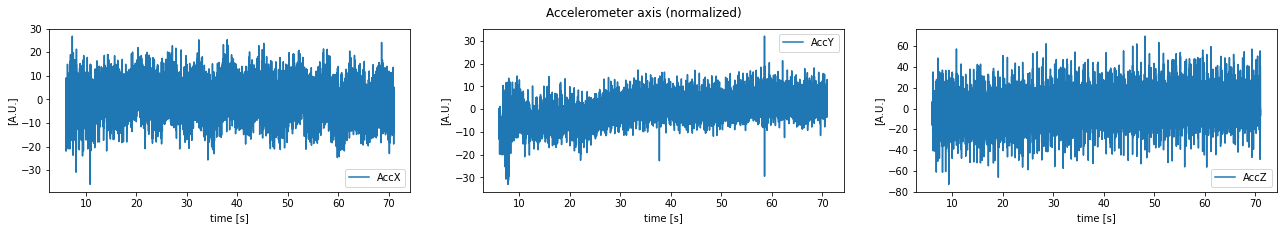

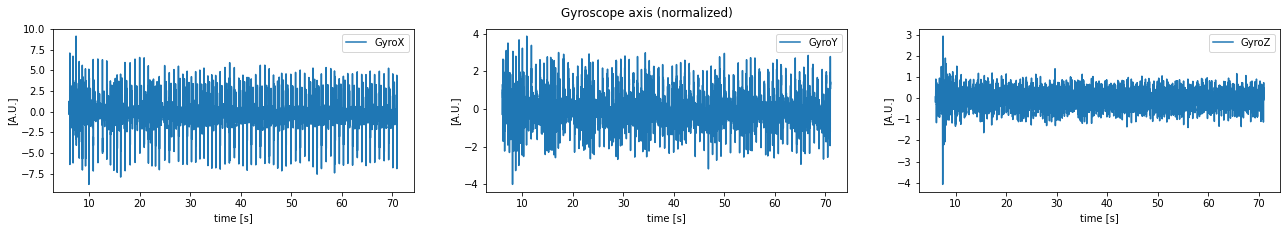

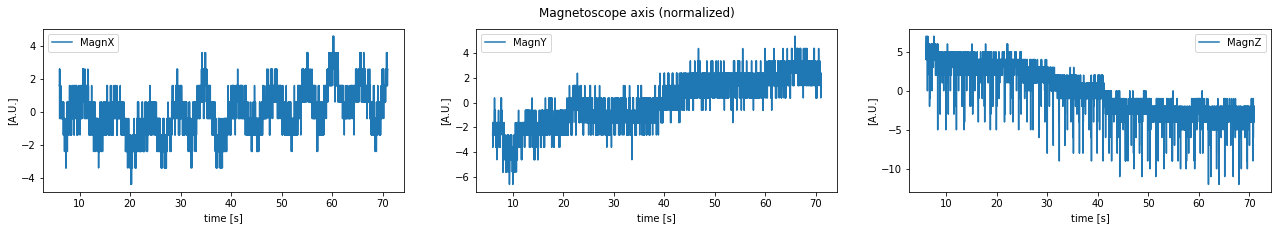

In [6]:
#accelerometer plots

figure, axes = plt.subplots(1, 3, figsize=(22,3))
figure.suptitle('Accelerometer axis (normalized)')
data.plot(ax=axes[0],y=['AccX'], ylabel='[A.U.]', xlabel='time [s]')
data.plot(ax=axes[1],y=['AccY'],ylabel='[A.U.]', xlabel='time [s]')
data.plot(ax=axes[2],y=['AccZ'], ylabel='[A.U.]', xlabel='time [s]')


#gyroscope plots

figure, axes = plt.subplots(1, 3, figsize=(22,3))
figure.suptitle('Gyroscope axis (normalized)')
data.plot(ax=axes[0],y=['GyroX'], ylabel='[A.U.]', xlabel='time [s]')
data.plot(ax=axes[1],y=['GyroY'],ylabel='[A.U.]', xlabel='time [s]')
data.plot(ax=axes[2],y=['GyroZ'], ylabel='[A.U.]', xlabel='time [s]')


#magnetoscope plots

figure, axes = plt.subplots(1, 3, figsize=(22,3))
figure.suptitle('Magnetoscope axis (normalized)')
data.plot(ax=axes[0],y=['MagnX'], ylabel='[A.U.]', xlabel='time [s]')
data.plot(ax=axes[1],y=['MagnY'],ylabel='[A.U.]', xlabel='time [s]')
data.plot(ax=axes[2],y=['MagnZ'], ylabel='[A.U.]', xlabel='time [s]');

In [7]:
#performing PCA

acc_columns = ['AccX','AccY','AccZ']
gyro_columns= ['GyroX','GyroY','GyroZ']
magn_columns=['MagnX','MagnY','MagnZ']

sampling_rate = 200 
sample_spacing = 1/sampling_rate
pca=PCA(n_components=2) 

 Accelerometer PCA: 

Percentage of variance due to the first component: 75.92%
Percentage of variance due to the second component: 13.91%


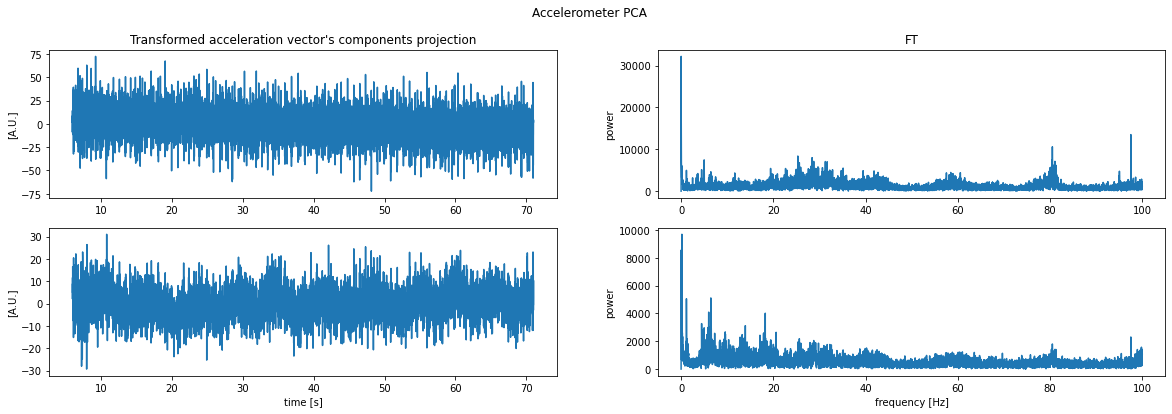

In [8]:
print(' Accelerometer PCA: \n')

pca.fit(data[acc_columns])
accT=pca.transform(data[acc_columns])

accT_FT1=fft.fft(accT[:,0])
accT_FT2=fft.fft(accT[:,1])
accT_FT_freq=fft.fftfreq(accT[:,0].size,sample_spacing)
N = int(accT_FT_freq.size/2) #ignoring negative frequencies since input is real valued


with plt.rc_context({"figure.figsize" : (20,6)}):
    fig,axs = plt.subplots(2,2)
    fig.suptitle('Accelerometer PCA')
    axs[0,0].plot(data.index,accT[:,0])
    axs[0,0].set_title("Transformed acceleration vector's components projection")
    axs[0,0].set_ylabel('[A.U.]')
    axs[0,1].plot(accT_FT_freq[:N],np.abs(accT_FT1[:N]))
    axs[0,1].set_title("FT")
    axs[0,1].set_ylabel('power')
    axs[1,0].plot(data.index,accT[:,1])
    axs[1,0].set_xlabel('time [s]')
    axs[1,0].set_ylabel('[A.U.]')
    axs[1,1].plot(accT_FT_freq[:N],np.abs(accT_FT2[:N]))
    axs[1,1].set_xlabel('frequency [Hz]')
    axs[1,1].set_ylabel('power');
    
print("Percentage of variance due to the first component: {:.2%}".format(pca.explained_variance_ratio_[0]))
print("Percentage of variance due to the second component: {:.2%}".format(pca.explained_variance_ratio_[1]))


 Gyroscope PCA: 

Percentage of variance due to the first component: 79.96%
Percentage of variance due to the second component: 15.95%


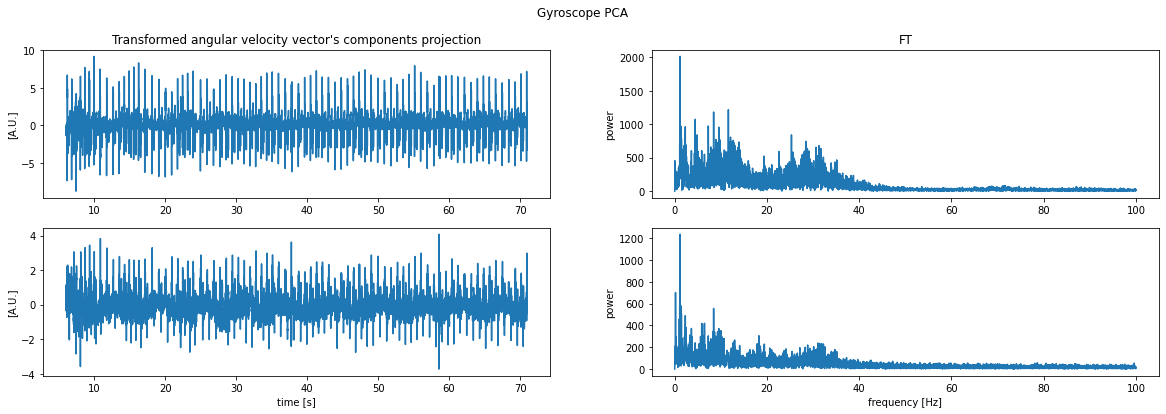

In [9]:
print('\n Gyroscope PCA: \n')

pca.fit(data[gyro_columns])
gyrT=pca.transform(data[gyro_columns])

gyrT_FT1=fft.fft(gyrT[:,0])
gyrT_FT2=fft.fft(gyrT[:,1])
gyrT_FT_freq=fft.fftfreq(gyrT[:,0].size,sample_spacing)
N = int(gyrT_FT_freq.size/2) 


with plt.rc_context({"figure.figsize" : (20,6)}):
    fig,axs = plt.subplots(2,2)
    fig.suptitle('Gyroscope PCA')
    axs[0,0].plot(data.index,gyrT[:,0])
    axs[0,0].set_title("Transformed angular velocity vector's components projection")
    axs[0,0].set_ylabel('[A.U.]')
    axs[0,1].plot(gyrT_FT_freq[:N],np.abs(gyrT_FT1[:N]))
    axs[0,1].set_title("FT")
    axs[0,1].set_ylabel('power')
    axs[1,0].plot(data.index,gyrT[:,1])
    axs[1,0].set_xlabel('time [s]')
    axs[1,0].set_ylabel('[A.U.]')
    axs[1,1].plot(gyrT_FT_freq[:N],np.abs(gyrT_FT2[:N]))
    axs[1,1].set_xlabel('frequency [Hz]')
    axs[1,1].set_ylabel('power')
    
print("Percentage of variance due to the first component: {:.2%}".format(pca.explained_variance_ratio_[0]))
print("Percentage of variance due to the second component: {:.2%}".format(pca.explained_variance_ratio_[1]))


 Magnetoscope PCA: 

Percentage of variance due to the first component: 81.08%
Percentage of variance due to the second component: 10.23%


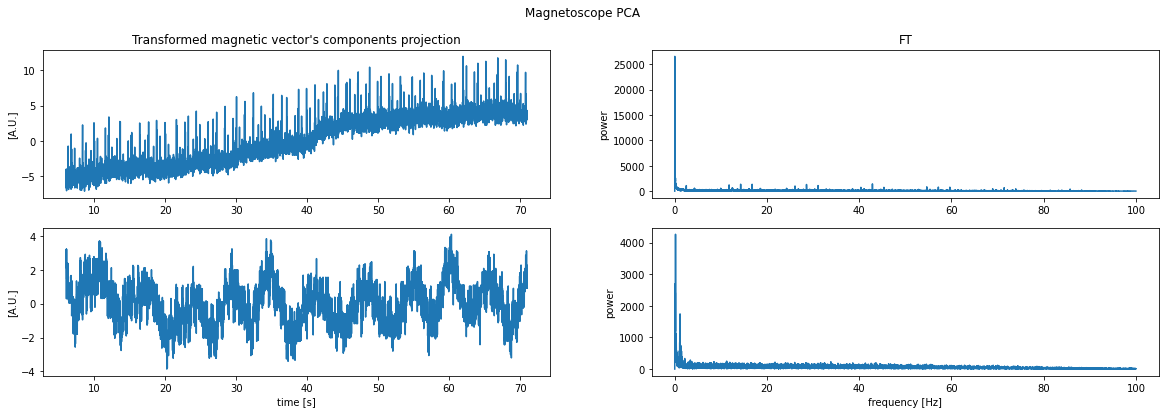

In [10]:
print('\n Magnetoscope PCA: \n')

pca.fit(data[magn_columns])
magT=pca.transform(data[magn_columns])

magT_FT1=fft.fft(magT[:,0])
magT_FT2=fft.fft(magT[:,1])
magT_FT_freq=fft.fftfreq(magT[:,0].size,sample_spacing)
N = int(magT_FT_freq.size/2) 

with plt.rc_context({"figure.figsize" : (20,6)}):
    fig,axs = plt.subplots(2,2)
    fig.suptitle('Magnetoscope PCA')
    axs[0,0].plot(data.index,magT[:,0])
    axs[0,0].set_title("Transformed magnetic vector's components projection")
    axs[0,0].set_ylabel('[A.U.]')
    axs[0,1].plot(magT_FT_freq[:N],np.abs(magT_FT1[:N]))
    axs[0,1].set_title("FT")
    axs[0,1].set_ylabel('power')
    axs[1,0].plot(data.index,magT[:,1])
    axs[1,0].set_xlabel('time [s]')
    axs[1,0].set_ylabel('[A.U.]')
    axs[1,1].plot(magT_FT_freq[:N],np.abs(magT_FT2[:N]))
    axs[1,1].set_xlabel('frequency [Hz]')
    axs[1,1].set_ylabel('power')
    
print("Percentage of variance due to the first component: {:.2%}".format(pca.explained_variance_ratio_[0]))
print("Percentage of variance due to the second component: {:.2%}".format(pca.explained_variance_ratio_[1]))

In [11]:
def clean_up(data_frame, sensor):
    
    #funzione che seleziona le componenti della PCA e toglie il drift
    #sensor vuole qualcosa del tipo "acc_columns = ['AccX','AccY','AccZ']"
        
    pca=PCA(n_components=2) 
    
    pca.fit(data_frame[sensor])
    sensorT=pca.transform(data_frame[sensor])  
    
    sensor_clean=np.zeros_like(sensorT)
    drift_sensor=np.zeros_like(sensorT)
    
    for i in range(2):
        drift_sensor[i]=np.polyfit(data_frame.index,sensorT[:,i],1)
        sensor_clean[:,i]=sensorT[:,i]-(drift_sensor[i,0]*data_frame.index + drift_sensor[i,1])
        
    return sensor_clean
        

In [18]:
def PCA_plot (data_frame,sensor,title):
    
    #funzione che plotta le componenti della PCA e la sua FT
    #title is a string
    #sensor vuole qualcosa del tipo "acc_columns = ['AccX','AccY','AccZ']"
    
    sampling_rate = 200 
    sample_spacing = 1/sampling_rate
    
    pca=PCA(n_components=2) 
    pca.fit(data_frame[sensor])
    
    sensorT=pca.transform(data_frame[sensor]) 
    
    sensorT_FT1=fft.fft(sensorT[:,0])
    sensorT_FT2=fft.fft(sensorT[:,1])
    sensorT_FT_freq=fft.fftfreq(sensorT[:,0].size,sample_spacing)
    N = int(sensorT_FT_freq.size/2) 
    
    with plt.rc_context({"figure.figsize" : (20,6)}):
        fig,axs = plt.subplots(2,2)
        fig.suptitle(title)
        axs[0,0].plot(data_frame.index,sensorT[:,0])
        axs[0,0].set_title("Transformed vector's components projection")
        axs[0,0].set_ylabel('[A.U.]')
        axs[0,1].plot(sensorT_FT_freq[:N],np.abs(sensorT_FT1[:N]))
        axs[0,1].set_title("FT")
        axs[0,1].set_ylabel('power')
        axs[1,0].plot(data_frame.index,sensorT[:,1])
        axs[1,0].set_xlabel('time [s]')
        axs[1,0].set_ylabel('[A.U.]')
        axs[1,1].plot(sensorT_FT_freq[:N],np.abs(sensorT_FT2[:N]))
        axs[1,1].set_xlabel('frequency [Hz]')
        axs[1,1].set_ylabel('power')

    print(title,'\n')
    print("Percentage of variance due to the first component: {:.2%}".format(pca.explained_variance_ratio_[0]))
    print("Percentage of variance due to the second component: {:.2%}".format(pca.explained_variance_ratio_[1]))


Accelerometer PCA 

Percentage of variance due to the first component: 75.92%
Percentage of variance due to the second component: 13.91%


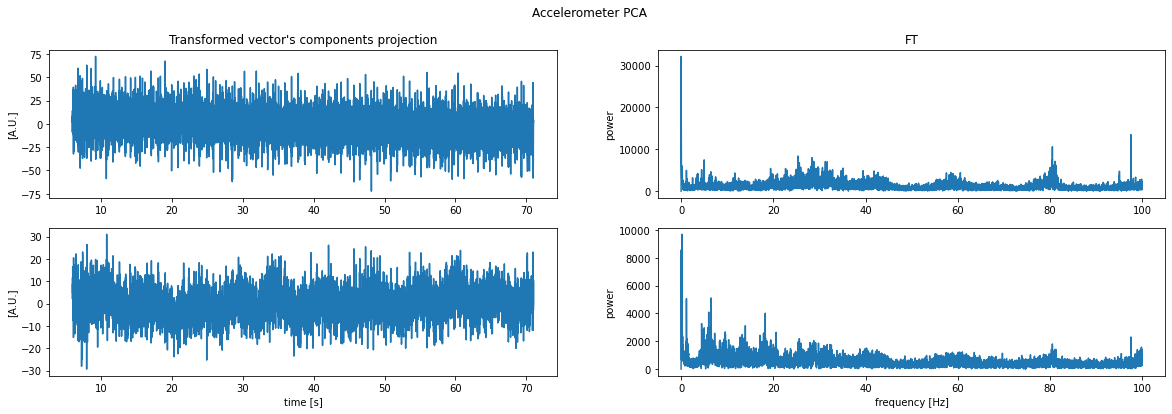

In [19]:
PCA_plot(data,acc_columns,'Accelerometer PCA')